<a href="https://colab.research.google.com/github/evelynakim/DATA201/blob/main/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 3: Examine NYPD Arrest Data by Identity & Location
**Background**<br>Police departments have been widely criticized for their discriminatory practices, often centered around identity or traits (such as location) that can serve as a proxy for identity (higher concentrations of x population in y location).<br><br>**Research Question**<br> Does identity have any connection to arrest frequency or type in this dataset?<br><br>**Goals**<br>Group arrest data into different identity-based populations to examine relationship between identity/population and type/likelihood of arrest. Is there a relationship? What story does it tell? Are there limitations to these findings and/or this data?<br><br>**Visualizations**<br>bar charts, line graphs<br><br>**Variables of Interest**<br>
* personal identifiers: *age, race, gender*
* contextual identifiers: *borough*
* general information: *arrest key, date, precinct, jurisdiction*
* dependent variables: *level of offense, pd description, offense description (less granular than pd description and may be more easily compiled)*

In [100]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker



In [2]:
#import data from API
df = pd.read_csv('https://data.cityofnewyork.us/resource/uip8-fykc.csv')
df.info() #examine dataframe: should have ~115k rows, but API import is only displaying 1000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   arrest_key         1000 non-null   int64  
 1   arrest_date        1000 non-null   object 
 2   pd_cd              999 non-null    float64
 3   pd_desc            998 non-null    object 
 4   ky_cd              998 non-null    float64
 5   ofns_desc          998 non-null    object 
 6   law_code           1000 non-null   object 
 7   law_cat_cd         994 non-null    object 
 8   arrest_boro        1000 non-null   object 
 9   arrest_precinct    1000 non-null   int64  
 10  jurisdiction_code  1000 non-null   int64  
 11  age_group          1000 non-null   object 
 12  perp_sex           1000 non-null   object 
 13  perp_race          1000 non-null   object 
 14  x_coord_cd         1000 non-null   int64  
 15  y_coord_cd         1000 non-null   int64  
 16  latitude           1000 n

In [3]:
#import data uploaded to google drive instead
df = pd.read_csv('/content/drive/MyDrive/python data/NYPD_Arrest_Data__Year_to_Date_.csv')
df.info() #check new dataframe information: has the proper number of rows and columns, will use

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115299 entries, 0 to 115298
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST_KEY                115299 non-null  int64  
 1   ARREST_DATE               115299 non-null  object 
 2   PD_CD                     115278 non-null  float64
 3   PD_DESC                   115238 non-null  object 
 4   KY_CD                     115238 non-null  float64
 5   OFNS_DESC                 115238 non-null  object 
 6   LAW_CODE                  115299 non-null  object 
 7   LAW_CAT_CD                114221 non-null  object 
 8   ARREST_BORO               115299 non-null  object 
 9   ARREST_PRECINCT           115299 non-null  int64  
 10  JURISDICTION_CODE         115299 non-null  int64  
 11  AGE_GROUP                 115299 non-null  object 
 12  PERP_SEX                  115299 non-null  object 
 13  PERP_RACE                 115299 non-null  o

In [4]:
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,234233843,09/29/2021,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,42,0,25-44,M,BLACK,1009231,240290,40.826189,-73.909738,POINT (-73.90973778899996 40.82618898100003)
1,234129823,09/27/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,BLACK,1003606,185050,40.674583,-73.930222,POINT (-73.93022154099998 40.67458330800008)
2,234040747,09/25/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,Q,101,0,25-44,M,BLACK,1049232,159210,40.603441,-73.765986,POINT (-73.76598558899997 40.60344094100003)
3,234047720,09/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0,25-44,M,BLACK,1006537,244511,40.837782,-73.919458,POINT (-73.91945797099999 40.83778161800007)
4,234042526,09/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0,25-44,M,BLACK,1007418,243859,40.835990,-73.916276,POINT (-73.91627635999998 40.83598980000005)


In [5]:
df.tail()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
115294,222689440,01/06/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,Q,102,0,18-24,M,ASIAN / PACIFIC ISLANDER,1031076,193779,40.698440,-73.831130,POINT (-73.83112953899997 40.69843969400005)
115295,222626401,01/05/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,B,49,0,25-44,M,BLACK HISPANIC,1027430,251105,40.855803,-73.843910,POINT (-73.84390995399998 40.85580274300003)
115296,222477062,01/01/2021,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL0511001,M,B,50,0,25-44,M,WHITE HISPANIC,1011047,256269,40.870041,-73.903112,POINT (-73.90311219699998 40.870041281000056)
115297,222728174,01/07/2021,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,Q,114,0,25-44,M,WHITE HISPANIC,1007694,219657,40.769561,-73.915363,POINT (-73.91536344699995 40.76956124200007)
115298,222535613,01/03/2021,792.0,WEAPONS POSSESSION 1 & 2,118.0,DANGEROUS WEAPONS,PL 265031B,F,K,67,0,25-44,M,BLACK,1000054,173952,40.644129,-73.943053,POINT (-73.94305278599995 40.64412879400004)


In [6]:
##Examining null values
print('Null Values:\n',df.isnull().sum()) #count null values

#count rows with at least one null value because summing the null count per column may result in duplicates.
print('\nRows with Nulls:',df.isnull().any(axis=1).sum()) #there are a little over 1k rows with null values (out of ~115k total rows)

#create lists of unique null values per column
pcode = list(df['LAW_CODE'].loc[df['PD_CD'].isnull()].unique()) #looking at PD_CD column
pdesc = list(df['LAW_CODE'].loc[df['PD_DESC'].isnull()].unique()) #looking at PD_DESC column
kcode = list(df['LAW_CODE'].loc[df['KY_CD'].isnull()].unique()) #looking at KY_CD column
odesc = list(df['LAW_CODE'].loc[df['OFNS_DESC'].isnull()].unique()) #looking at OFNS_DESC column
lcat = list(df['LAW_CODE'].loc[df['LAW_CAT_CD'].isnull()].unique()) #looking at LAW_CAT_CD column

#create array of ALL law codes w/ null values
nlaw = pcode + pdesc + kcode + odesc + lcat #combine lists
nlaw_unique = np.unique(nlaw).tolist() #create list of unique values from combined array
print('\nAll Law Codes for Null Values:',nlaw_unique) #print unique list values

#look at different columns for each unique law code
print('PD Descriptions:',list(df['PD_DESC'].loc[df['LAW_CODE'].isin(nlaw_unique)].unique())) #all are null or unclassified, fugitives, or parole violations 
print('Offense Descriptions',list(df['OFNS_DESC'].loc[df['LAW_CODE'].isin(nlaw_unique)].unique())) # all are null or were handed off other authorities
print('Levels of Offense',list(df['LAW_CAT_CD'].loc[df['LAW_CODE'].isin(nlaw_unique)].unique()),'\n') #all are null or were felonies or misdemeanors

#create dataframe to examine entire row per each unique law code 
df_nlaw = df.loc[df['LAW_CODE'].isin(nlaw_unique)].drop_duplicates(subset=['LAW_CODE'])
df_nlaw

Null Values:
 ARREST_KEY                     0
ARREST_DATE                    0
PD_CD                         21
PD_DESC                       61
KY_CD                         61
OFNS_DESC                     61
LAW_CODE                       0
LAW_CAT_CD                  1078
ARREST_BORO                    0
ARREST_PRECINCT                0
JURISDICTION_CODE              0
AGE_GROUP                      0
PERP_SEX                       0
PERP_RACE                      0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
New Georeferenced Column       0
dtype: int64

Rows with Nulls: 1139

All Law Codes for Null Values: ['FCA000000M', 'FOA9000015', 'FOA9000016', 'FOA9000029', 'FOA9000035', 'FOA9000049', 'PL 1251401', 'PL 1252100', 'PL 1356100', 'PL 1950200', 'PL 2203400', 'PL 2223001', 'PL 2223002', 'PL 2223501', 'PL 2223502', 'PL 2224001', 'PL 2224002', 'PL 2225001', 'PL 2225501', 'PL 2226500', 'PL 241020

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
5,234006839,09/24/2021,582.0,NaN,NaN,NaN,PL 2225501,F,M,23,0,25-44,M,BLACK,998659,228177,40.792966,-73.947964,POINT (-73.94796350499998 40.79296572700008)
152,232449002,08/19/2021,49.0,U.S. CODE UNCLASSIFIED,995.0,FOR OTHER AUTHORITIES,FOA9000049,NaN,M,5,0,45-64,M,WHITE,983859,199257,40.713599,-74.001412,POINT (-74.00141185699994 40.71359938900008)
433,232559588,08/21/2021,NaN,NaN,NaN,NaN,PL 2410202,M,B,41,0,45-64,F,BLACK,1015683,237311,40.817992,-73.886439,POINT (-73.88643880199999 40.81799187000007)
1185,232839813,08/28/2021,NaN,NaN,NaN,NaN,PL 2650022,M,M,7,0,18-24,M,BLACK HISPANIC,987296,201153,40.718803,-73.989013,POINT (-73.98901309199994 40.718802940000046)
1645,234192429,09/28/2021,578.0,NaN,NaN,NaN,PL 2223001,M,K,78,0,18-24,M,WHITE HISPANIC,988678,184065,40.671900,-73.984039,POINT (-73.98403879999995 40.67189975500003)
2590,233580713,09/15/2021,35.0,NYS UNCLASSIFIED,995.0,FOR OTHER AUTHORITIES,FOA9000035,NaN,M,33,0,65+,M,WHITE HISPANIC,1002031,245650,40.840918,-73.935739,POINT (-73.93573927899996 40.84091806300006)
3306,232750697,08/26/2021,16.0,FUGITIVE/OTHER STATES,995.0,FOR OTHER AUTHORITIES,FOA9000016,NaN,M,7,0,25-44,M,BLACK,988832,200278,40.716401,-73.983473,POINT (-73.98347261399994 40.716400613000076)
3854,233915137,09/22/2021,NaN,NaN,NaN,NaN,PL 2203400,F,B,44,0,25-44,M,BLACK,1008469,243559,40.835164,-73.912479,POINT (-73.91247931499998 40.83516356800004)
3936,233668457,09/16/2021,29.0,NYS PAROLE VIOLATION,995.0,FOR OTHER AUTHORITIES,FOA9000029,NaN,B,40,0,45-64,M,WHITE HISPANIC,1005041,234533,40.810398,-73.924895,POINT (-73.92489531099994 40.810398494000026)
4714,233108611,09/03/2021,581.0,NaN,NaN,NaN,PL 2225001,M,B,42,2,18-24,M,WHITE HISPANIC,1010810,244029,40.836447,-73.904018,POINT (-73.90401760099996 40.83644685100006)


Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

 BLACK                       388
WHITE HISPANIC              324
BLACK HISPANIC              157
WHITE                       112
ASIAN / PACIFIC ISLANDER     86
UNKNOWN                      11
Name: PERP_RACE, dtype: int64 



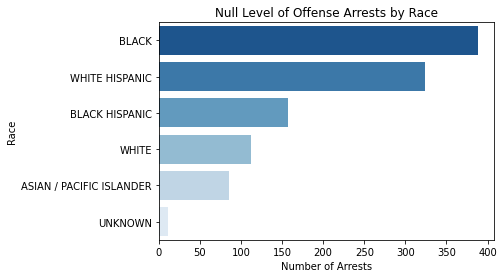

In [24]:
print(df.columns) #grab column names

#look at racial breakdown of null values in level of offense column
print('\n',df['PERP_RACE'].loc[df['LAW_CAT_CD'].isnull()].value_counts(),'\n')

#examine racial breakdown for null entries in level of offense column with seaborn
ax = sns.countplot(y='PERP_RACE', data=df[df['LAW_CAT_CD'].isnull()], palette='Blues_r', #visualize using seaborn
                   order=df['PERP_RACE'].loc[df['LAW_CAT_CD'].isnull()].value_counts().index) #to order the results using seaborn, we still need the segmented column
ax.set(xlabel='Number of Arrests',title='Null Level of Offense Arrests by Race')
plt.show()

In [32]:
##DATA CLEANING PREP## 
#I want to replace column values for several columns, so I want to check the unique values in each before making any changes
print(df.columns) #grab column names again

#Level of Offense Column Unique values: there should be three values (F = Felony, M = Misdemeanor, V = Violation)
print('\nUnique Levels of Offense:',df['LAW_CAT_CD'].unique()) #excluding null values, there is a fourth value ('I'). pull the count of each unique value to see how prevalent unknown value 'I' is within the data
print('Value Counts:\n',df['LAW_CAT_CD'].value_counts()) #we see that 'I' is pretty prevalent
print('\n',df[['OFNS_DESC','LAW_CAT_CD']].loc[df['LAW_CAT_CD'] == 'I'].head(10)) #After some research and examining the dataframe, I believe 'I' = Infraction

#find unique values in Age column
print('\nUnique Ages:', df['AGE_GROUP'].unique()) #no need to rename

#find unique values in Borough column: there should be five values
print('\nUnique Boroughs:',df['ARREST_BORO'].unique()) #will rename to include full borough names

#find and count unique values in Jurisdiction column: only 3 are specifically identified (0 = Patrol, 1 = Transit, 2 = Housing). All values 3+ represent non-NYPD jursidictions
print('\nUnique Jurisdictions:',list(df['JURISDICTION_CODE'].unique())) #list of unique values
print('# Unique Jurisdictions:',df['JURISDICTION_CODE'].nunique()) #count of unique values (there are 25)
print('\nCount of Each Jursidiction') #header
print(df['JURISDICTION_CODE'].value_counts()) #pull unique value counts to see how prevalent non-NYPD jursidictions are within the data
#since there is a somewhat significant count for non-NYPD jurisdictions, we can keep this data and refer to them all as non-NYPD when renaming.

#find unique values in Sex column
print('\nUnique Sexes:',df['PERP_SEX'].unique()) #there are only M and F. Will rename as Male and Female.


Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

Unique Levels of Offense: ['F' 'M' nan 'I' 'V']
Value Counts:
 M    61204
F    52578
V      270
I      169
Name: LAW_CAT_CD, dtype: int64

                      OFNS_DESC LAW_CAT_CD
309   OTHER TRAFFIC INFRACTION          I
380   OTHER TRAFFIC INFRACTION          I
1015  OTHER TRAFFIC INFRACTION          I
1214  OTHER TRAFFIC INFRACTION          I
1324        MOVING INFRACTIONS          I
1570  OTHER TRAFFIC INFRACTION          I
1676  OTHER TRAFFIC INFRACTION          I
2143  OTHER TRAFFIC INFRACTION          I
2339  OTHER TRAFFIC INFRACTION          I
2531  OTHER TRAFFIC INFRACTION          I

Unique Ages: ['25-44' '18-24' '45-64' '<18' '65+']

Unique Boroughs: ['B' 

In [42]:
##DATA CLEANING##
print('old columns:',list(df.columns)) #grab column names
#create new dataframe for analysis, dropping columns I don't want
df1 = df.drop(['X_COORD_CD','Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'], axis=1)
print('new columns:', list(df1.columns)) #check columns were dropped

#RENAMING COLUMN NAMES
df1 = df1.rename(columns={'ARREST_KEY':'Arrest Key', 'ARREST_DATE':'Date', 'PD_CD':'PD Code', 'PD_DESC':'PD Description','KY_CD':'Key Code','OFNS_DESC':'Offense Description',
                          'LAW_CODE': 'Law Code', 'LAW_CAT_CD':'Level of Offense', 'ARREST_BORO':'Borough', 'ARREST_PRECINCT':'Precinct','JURISDICTION_CODE':'Jurisdiction',
                          'AGE_GROUP':'Age', 'PERP_SEX':'Sex','PERP_RACE':'Race'}) #rename columns
df1 = df1.applymap(lambda s: s.title() if type(s) == str else s) #change all dataframe entries to title case
df1['Law Code'] = df1['Law Code'].apply(lambda s: s.upper() if type(s) == str else s) #return Law Code column to title case to more easily read column values

#RENAMING COLUMN VALUES
#grab unique column values
print('\nBEFORE RENAMING:\nLevels of Offense:',
      df1['Level of Offense'].unique().tolist(),
      '\nBoroughs:',df1['Borough'].unique().tolist(),
      '\nJurisdictions:',df1['Jurisdiction'].unique().tolist(),
      '\nSex:',df1['Sex'].unique().tolist()
      )

#replace level of offense abbreviated values with full description
df1['Level of Offense'].replace(['F', 'M', 'I', 'V'],['Felony', 'Misdemeanor', 'Infraction', 'Violation'], inplace=True)
#replace borough abbreviated values with full borough names
df1['Borough'].replace(['B', 'K', 'Q', 'M', 'S'],['Bronx', 'Brooklyn','Queens','Manhattan','Staten Island'], inplace=True)
#replace jurisdiction code values with full description
df1['Jurisdiction'].replace([0, 1, 2],['Patrol', 'Transit', 'Housing'], inplace=True)
df1['Jurisdiction'].replace([71, 3, 15, 97, 72, 73, 7, 11, 14, 87, 4, 12, 85, 13, 6, 88, 74, 16, 8, 69, 76, 9],'Non-NYPD', inplace=True)
#replace sex abbreviated values with full description
df1['Sex'].replace({'M': 'Male', 'F': 'Female'}, inplace=True)

#check renaming worked
print('\nAFTER RENAMING:\nLevels of Offense:',
      df1['Level of Offense'].unique().tolist(),
      '\nBoroughs:',df1['Borough'].unique().tolist(),
      '\nJurisdictions:',df1['Jurisdiction'].unique().tolist(),
      '\nSex:',df1['Sex'].unique().tolist()
)

old columns: ['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC', 'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT', 'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column']
new columns: ['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC', 'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT', 'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE']

BEFORE RENAMING:
Levels of Offense: ['F', 'M', nan, 'I', 'V'] 
Boroughs: ['B', 'K', 'Q', 'M', 'S'] 
Jurisdictions: [0, 1, 71, 2, 3, 15, 97, 72, 73, 7, 11, 14, 87, 4, 12, 85, 13, 6, 88, 74, 16, 8, 69, 76, 9] 
Sex: ['M', 'F']

AFTER RENAMING:
Levels of Offense: ['Felony', 'Misdemeanor', nan, 'Infraction', 'Violation'] 
Boroughs: ['Bronx', 'Brooklyn', 'Queens', 'Manhattan', 'Staten Island'] 
Jurisdictions: ['Patrol', 'Transit', 'Non-NYPD', 'Housing'] 
Sex: ['Male', 'Female']


In [43]:
#check dataframe
df1.head(10)

,Arrest Key,Date,PD Code,PD Description,Key Code,Offense Description,Law Code,Level of Offense,Borough,Precinct,Jurisdiction,Age,Sex,Race
0,234233843,09/29/2021,105.0,Strangulation 1St,106.0,Felony Assault,PL 1211200,Felony,Bronx,42,Patrol,25-44,Male,Black
1,234129823,09/27/2021,157.0,Rape 1,104.0,Rape,PL 1303501,Felony,Brooklyn,77,Patrol,25-44,Male,Black
2,234040747,09/25/2021,109.0,"Assault 2,1,Unclassified",106.0,Felony Assault,PL 1200501,Felony,Queens,101,Patrol,25-44,Male,Black
3,234047720,09/25/2021,101.0,Assault 3,344.0,Assault 3 & Related Offenses,PL 1200001,Misdemeanor,Bronx,44,Patrol,25-44,Male,Black
4,234042526,09/25/2021,101.0,Assault 3,344.0,Assault 3 & Related Offenses,PL 1200001,Misdemeanor,Bronx,44,Patrol,25-44,Male,Black
5,234006839,09/24/2021,582.0,NaN,NaN,NaN,PL 2225501,Felony,Manhattan,23,Patrol,25-44,Male,Black
6,233952333,09/23/2021,397.0,"Robbery,Open Area Unclassified",105.0,Robbery,PL 1600500,Felony,Brooklyn,75,Patrol,18-24,Male,Black
7,233878488,09/21/2021,105.0,Strangulation 1St,106.0,Felony Assault,PL 1211300,Felony,Bronx,40,Patrol,25-44,Male,White
8,233784866,09/19/2021,101.0,Assault 3,344.0,Assault 3 & Related Offenses,PL 1200001,Misdemeanor,Bronx,44,Patrol,25-44,Female,Black
9,233647454,09/16/2021,397.0,"Robbery,Open Area Unclassified",105.0,Robbery,PL 1601503,Felony,Brooklyn,61,Patrol,18-24,Male,Black


In [44]:
#examine dataframe for further cleaning
df1.info() #we see there are some null values in these columns: PD Code, PD description, Key Code, Offense Description, Level of Offense)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115299 entries, 0 to 115298
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Arrest Key           115299 non-null  int64  
 1   Date                 115299 non-null  object 
 2   PD Code              115278 non-null  float64
 3   PD Description       115238 non-null  object 
 4   Key Code             115238 non-null  float64
 5   Offense Description  115238 non-null  object 
 6   Law Code             115299 non-null  object 
 7   Level of Offense     114221 non-null  object 
 8   Borough              115299 non-null  object 
 9   Precinct             115299 non-null  int64  
 10  Jurisdiction         115299 non-null  object 
 11  Age                  115299 non-null  object 
 12  Sex                  115299 non-null  object 
 13  Race                 115299 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 12.3+ MB


In [81]:
#create dataframes for data subsets
#boroughs
bk = df1[df1['Borough'] == 'Brooklyn']
bx = df1[df1['Borough'] == 'Bronx']
mn = df1[df1['Borough'] == 'Manhattan']
qn = df1[df1['Borough'] == 'Queens']
si = df1[df1['Borough'] == 'Staten Island']

#jurisdictions
patrol = df1[df1['Jurisdiction'] == 'Patrol']
transit = df1[df1['Jurisdiction'] == 'Transit']
notnypd = df1[df1['Jurisdiction'] == 'Non-NYPD']
housing = df1[df1['Jurisdiction'] == 'Housing']

LOOKING AT RACE



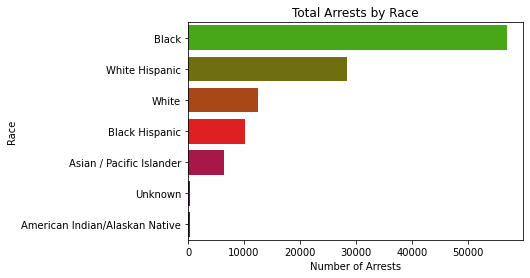

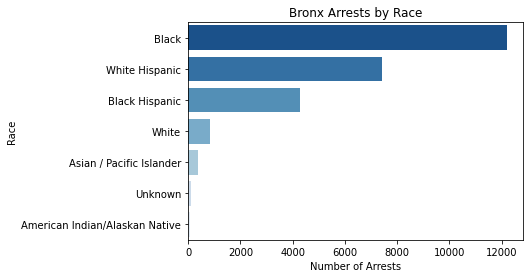

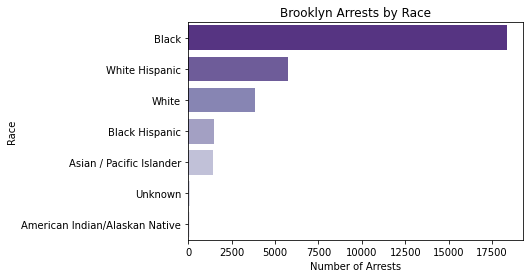

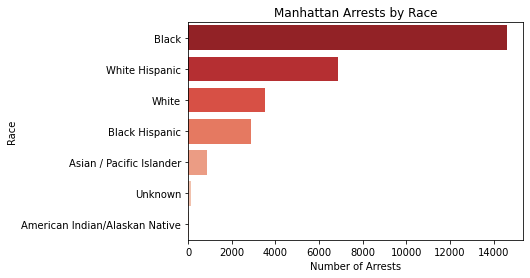

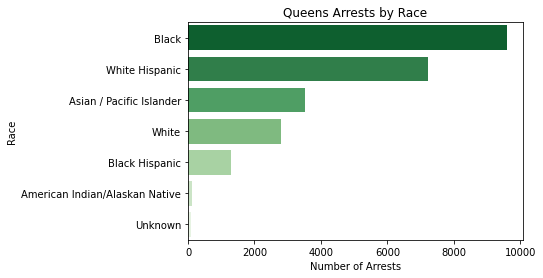

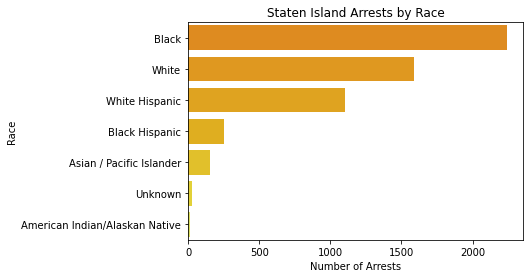

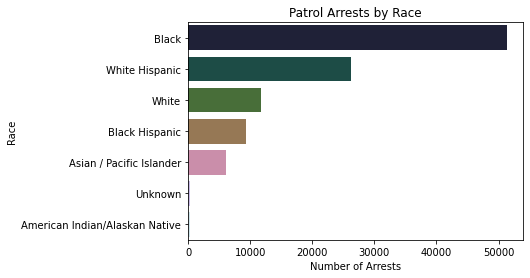

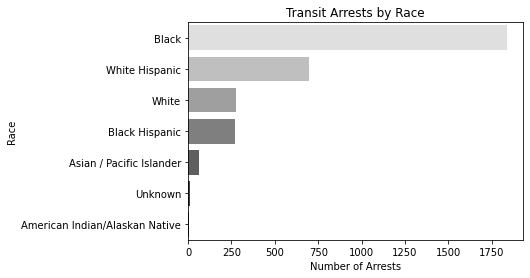

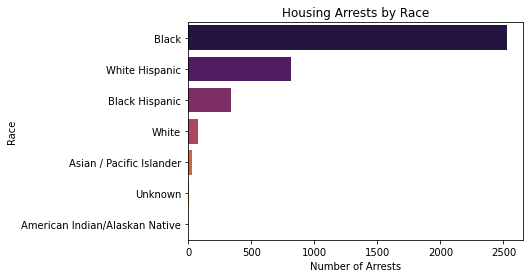

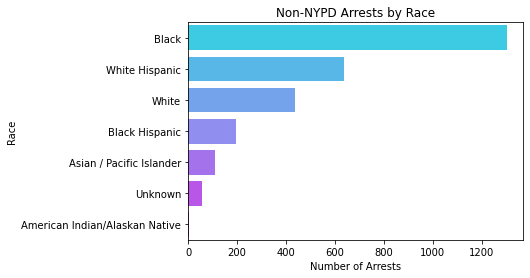

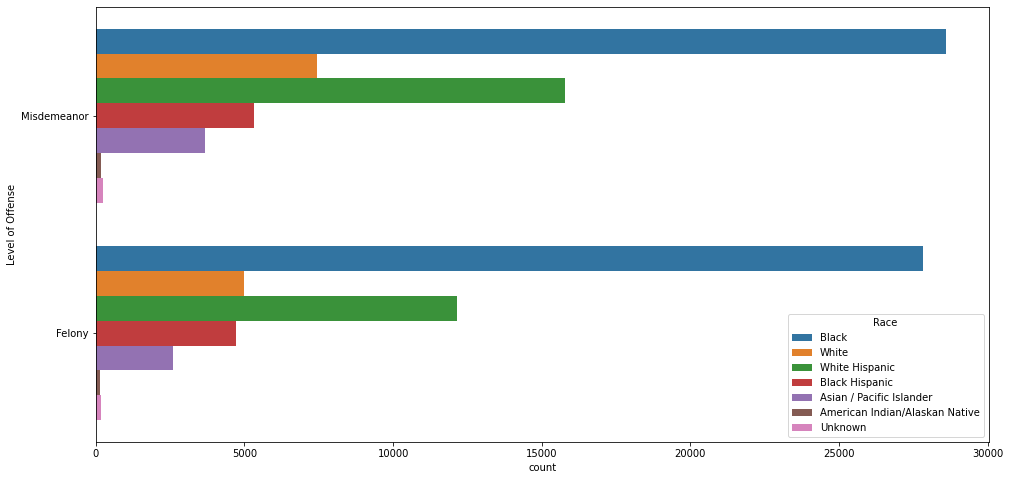

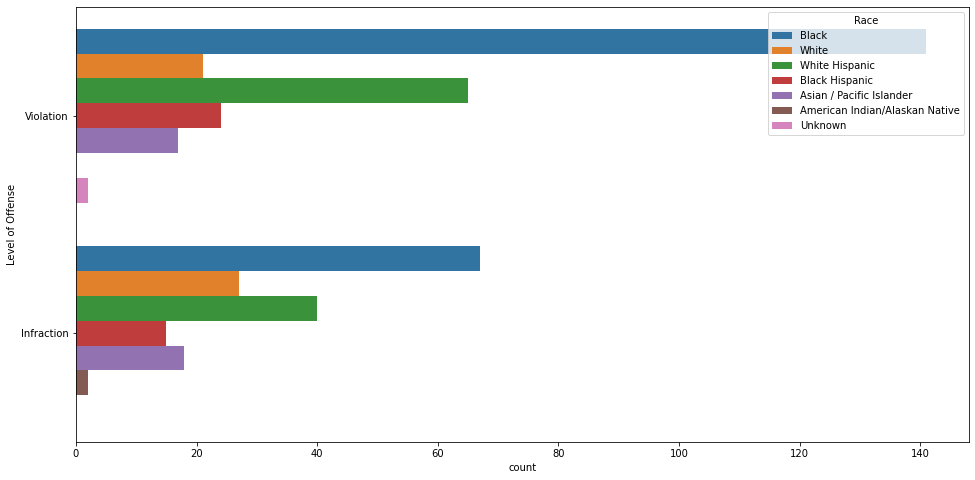

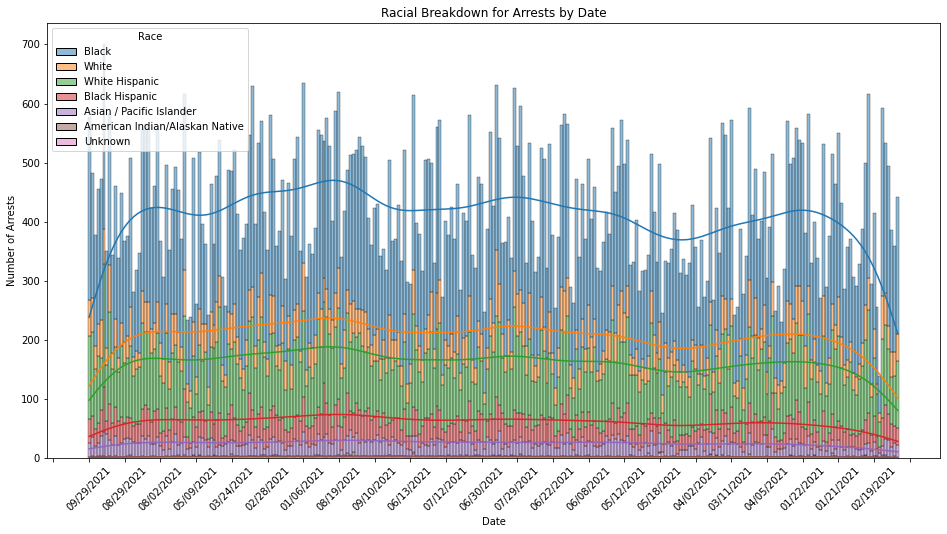

In [166]:
##VISUALIZATIONS##
#LOOKING AT RACE
print('LOOKING AT RACE\n')
plt.figure() #total arrests by race - initialize new figure
ax = sns.countplot(y='Race', data=df1, palette='brg_r', order=df1['Race'].value_counts().index)
ax.set(xlabel='Number of Arrests',title='Total Arrests by Race')
plt.show()

#BY BOROUGH
plt.figure() #bronx arrests
ax = sns.countplot(y='Race', data=bx, palette='Blues_r', order=bx['Race'].value_counts().index)
ax.set(xlabel='Number of Arrests',title='Bronx Arrests by Race')
plt.show()
plt.figure() #brooklyn arrests
ax = sns.countplot(y='Race', data=bk, palette='Purples_r', order=bk['Race'].value_counts().index)
ax.set(xlabel='Number of Arrests',title='Brooklyn Arrests by Race')
plt.show()
plt.figure() #manhattan arrests
ax = sns.countplot(y='Race', data=mn, palette='Reds_r', order=mn['Race'].value_counts().index)
ax.set(xlabel='Number of Arrests',title='Manhattan Arrests by Race')
plt.show()
plt.figure() #queens arrests
ax = sns.countplot(y='Race', data=qn, palette='Greens_r', order=qn['Race'].value_counts().index) 
ax.set(xlabel='Number of Arrests',title='Queens Arrests by Race')
plt.show()
plt.figure() #staten island arrests
ax = sns.countplot(y='Race', data=si, palette='Wistia_r', order=si['Race'].value_counts().index)
ax.set(xlabel='Number of Arrests',title='Staten Island Arrests by Race')
plt.show()

#BY JURISDICTION
plt.figure() #patrol arrests
ax = sns.countplot(y='Race', data=patrol, palette='cubehelix', order=patrol['Race'].value_counts().index)
ax.set(xlabel='Number of Arrests',title='Patrol Arrests by Race')
plt.show()
plt.figure() #transit arrests
ax = sns.countplot(y='Race', data=transit, palette='binary', order=transit['Race'].value_counts().index)
ax.set(xlabel='Number of Arrests',title='Transit Arrests by Race')
plt.show()
plt.figure() #housing arrests
ax = sns.countplot(y='Race', data=housing, palette='inferno', order=housing['Race'].value_counts().index)
ax.set(xlabel='Number of Arrests',title='Housing Arrests by Race')
plt.show()
plt.figure() #non-nypd arrests 
ax = sns.countplot(y='Race', data=notnypd, palette='cool', order=notnypd['Race'].value_counts().index) 
ax.set(xlabel='Number of Arrests',title='Non-NYPD Arrests by Race')
plt.show()

#BY OFFENSE LEVEL
plt.figure(figsize=(16,8)) #Misdemeanor & Felony arrests
ax.set(xlabel='Number of Arrests',title='Misdemeanor & Felony Arrests by Race')
ax = sns.countplot(y='Level of Offense', data=df1.loc[df1['Level of Offense'].isin(['Misdemeanor','Felony'])], hue='Race', order=df1['Level of Offense'].loc[df1['Level of Offense'].isin(['Misdemeanor','Felony'])].value_counts().index)
plt.show()

plt.figure(figsize=(16,8)) #Violation & Infraction arrests
ax.set(xlabel='Number of Arrests',title='Violation and Infraction Arrests by Race')
ax = sns.countplot(y='Level of Offense', data=df1.loc[df1['Level of Offense'].isin(['Violation','Infraction'])], hue='Race', hue_order=['Black','White','White Hispanic','Black Hispanic','Asian / Pacific Islander','American Indian/Alaskan Native','Unknown'], order=df1['Level of Offense'].loc[df1['Level of Offense'].isin(['Violation','Infraction'])].value_counts().index)
plt.show()

#BY DATE
plt.figure(figsize=(16,8)) #arrests timeline
ax = sns.histplot(x='Date', data=df1, hue='Race', multiple='stack', kde=True) 
ax.set(ylabel='Number of Arrests',title='Racial Breakdown for Arrests by Date')
ax.xaxis.set_major_locator(ticker.MultipleLocator(12))
plt.xticks(rotation=45)
plt.show()

In [ ]:
##VISUALIZATIONS##
#LOOKING AT AGE
print('LOOKING AT AGE\n')
plt.figure() #total arrests by age
ax = sns.countplot(y='Age', data=df1, palette='brg_r', order=df1['Age'].value_counts().index)
ax.set(xlabel='Number of Arrests',title='Total Arrests by Age')
plt.show()

#BY BOROUGH
plt.figure() #bronx arrests
ax = sns.countplot(y='Age', data=bx, palette='Blues_r', order=bx['Age'].value_counts().index)
ax.set(xlabel='Number of Arrests',title='Bronx Arrests by Age')
plt.show()
plt.figure() #brooklyn arrests
ax = sns.countplot(y='Age', data=bk, palette='Purples_r', order=bk['Age'].value_counts().index)
ax.set(xlabel='Number of Arrests',title='Brooklyn Arrests by Age')
plt.show()
plt.figure() #manhattan arrests
ax = sns.countplot(y='Age', data=mn, palette='Reds_r', order=mn['Age'].value_counts().index)
ax.set(xlabel='Number of Arrests',title='Manhattan Arrests by Age')
plt.show()
plt.figure() #queens arrests
ax = sns.countplot(y='Age', data=qn, palette='Greens_r', order=qn['Age'].value_counts().index) 
ax.set(xlabel='Number of Arrests',title='Queens Arrests by Age')
plt.show()
plt.figure() #staten island arrests
ax = sns.countplot(y='Age', data=si, palette='Wistia_r', order=si['Age'].value_counts().index)
ax.set(xlabel='Number of Arrests',title='Staten Island Arrests by Age')
plt.show()

#BY JURISDICTION
plt.figure() #patrol arrests
ax = sns.countplot(y='Age', data=patrol, palette='cubehelix', order=patrol['Age'].value_counts().index)
ax.set(xlabel='Number of Arrests',title='Patrol Arrests by Age')
plt.show()
plt.figure() #transit arrests
ax = sns.countplot(y='Age', data=transit, palette='binary', order=transit['Age'].value_counts().index)
ax.set(xlabel='Number of Arrests',title='Transit Arrests by Age')
plt.show()
plt.figure() #housing arrests
ax = sns.countplot(y='Age', data=housing, palette='inferno', order=housing['Age'].value_counts().index)
ax.set(xlabel='Number of Arrests',title='Housing Arrests by Age')
plt.show()
plt.figure() #non-nypd arrests 
ax = sns.countplot(y='Age', data=notnypd, palette='cool', order=notnypd['Age'].value_counts().index) 
ax.set(xlabel='Number of Arrests',title='Non-NYPD Arrests by Age')
plt.show()

#BY OFFENSE LEVEL
plt.figure(figsize=(12,4)) #Misdemeanor & Felony arrests
ax = sns.countplot(y='Level of Offense', data=df1.loc[df1['Level of Offense'].isin(['Misdemeanor','Felony'])], hue='Age', order=df1['Level of Offense'].loc[df1['Level of Offense'].isin(['Misdemeanor','Felony'])].value_counts().index)
ax.set(xlabel='Number of Arrests',title='Misdemeanor & Felony Arrests by Age')
plt.show()

plt.figure(figsize=(12,4)) #Violation & Infraction arrests
ax = sns.countplot(y='Level of Offense', data=df1.loc[df1['Level of Offense'].isin(['Violation','Infraction'])], hue='Age', hue_order=['25-44','18-24','45-65','<18','65+'],order=df1['Level of Offense'].loc[df1['Level of Offense'].isin(['Violation','Infraction'])].value_counts().index)
ax.set(xlabel='Number of Arrests',title='Violation and Infraction Arrests by Age')
plt.show()

#BY DATE
plt.figure(figsize=(16,8)) #arrests timeline
ax = sns.histplot(x='Date', data=df1, hue='Age', multiple='stack', kde=True) 
ax.set(ylabel='Number of Arrests',title='Age Breakdown for Arrests by Date')
ax.xaxis.set_major_locator(ticker.MultipleLocator(12))
plt.xticks(rotation=45)
plt.show()

In [ ]:
#LOOKING AT GENDER
print('LOOKING AT GENDER\n')
plt.figure() #total arrests by gender - initialize new figure
ax = sns.countplot(y='Sex', data=df1, palette='brg_r')
ax.set(xlabel='Number of Arrests',title='Total Arrests by Sex')
plt.show()

#BY BOROUGH
plt.figure() #bronx arrests
ax = sns.countplot(y='Sex', data=bx, palette='Blues_r', order=bx['Sex'].value_counts().index)
ax.set(xlabel='Number of Arrests',title='Bronx Arrests by Sex')
plt.show()
plt.figure() #brooklyn arrests
ax = sns.countplot(y='Sex', data=bk, palette='Purples_r', order=bk['Sex'].value_counts().index)
ax.set(xlabel='Number of Arrests',title='Brooklyn Arrests by Sex')
plt.show()
plt.figure() #manhattan arrests
ax = sns.countplot(y='Sex', data=mn, palette='Reds_r', order=mn['Sex'].value_counts().index)
ax.set(xlabel='Number of Arrests',title='Manhattan Arrests by Sex')
plt.show()
plt.figure() #queens arrests
ax = sns.countplot(y='Sex', data=qn, palette='Greens_r', order=qn['Sex'].value_counts().index) 
ax.set(xlabel='Number of Arrests',title='Queens Arrests by Sex')
plt.show()
plt.figure() #staten island arrests
ax = sns.countplot(y='Sex', data=si, palette='Wistia_r', order=si['Sex'].value_counts().index)
ax.set(xlabel='Number of Arrests',title='Staten Island Arrests by Sex')
plt.show()

#BY JURISDICTION
plt.figure() #patrol arrests
ax = sns.countplot(y='Sex', data=patrol, palette='cubehelix', order=patrol['Sex'].value_counts().index)
ax.set(xlabel='Number of Arrests',title='Patrol Arrests by Sex')
plt.show()
plt.figure() #transit arrests
ax = sns.countplot(y='Sex', data=transit, palette='binary', order=transit['Sex'].value_counts().index)
ax.set(xlabel='Number of Arrests',title='Transit Arrests by Sex')
plt.show()
plt.figure() #housing arrests
ax = sns.countplot(y='Sex', data=housing, palette='inferno', order=housing['Sex'].value_counts().index)
ax.set(xlabel='Number of Arrests',title='Housing Arrests by Sex')
plt.show()
plt.figure() #non-nypd arrests 
ax = sns.countplot(y='Sex', data=notnypd, palette='cool', order=notnypd['Sex'].value_counts().index) 
ax.set(xlabel='Number of Arrests',title='Non-NYPD Arrests by Sex')
plt.show()

#BY OFFENSE LEVEL
plt.figure() #Misdemeanor & Felony arrests
ax = sns.countplot(y='Level of Offense', data=df1.loc[df1['Level of Offense'].isin(['Misdemeanor','Felony'])], hue='Sex', order=df1['Level of Offense'].loc[df1['Level of Offense'].isin(['Misdemeanor','Felony'])].value_counts().index)
ax.set(xlabel='Number of Arrests',title='Misdemeanor & Felony Arrests by Sex')
plt.show()

plt.figure() #Violation & Infraction arrests
ax = sns.countplot(y='Level of Offense', data=df1.loc[df1['Level of Offense'].isin(['Violation','Infraction'])], hue='Sex', order=df1['Level of Offense'].loc[df1['Level of Offense'].isin(['Violation','Infraction'])].value_counts().index)
ax.set(xlabel='Number of Arrests',title='Violation and Infraction Arrests by Sex')
plt.show()

#BY DATE
plt.figure(figsize=(16,8)) #arrests timeline
ax = sns.histplot(x='Date', data=df1, hue='Sex', multiple='stack', kde=True) 
ax.set(ylabel='Number of Arrests',title='Gender Breakdown for Arrests by Date')
ax.xaxis.set_major_locator(ticker.MultipleLocator(12))
plt.xticks(rotation=45)
plt.show()

#Limitations
This data is limited by several factors, many of which stem from the fact that the NYPD is both the source and subject of this data. Some limitations include:
* Likelihood of arrest ≠ likelihood to commit crime. People are arrested at the discretion of the police, and as such different populations have different likelihoods of arrest that do not necessarily correlate to crime levels between populations.
* It's difficult to examine connections to gender in depth, due to this dataset's use of sex (male/female). It means we cannot look into gender identity, a factor we know can be extremely relevant to likelihood of arrest.
* There was missing data pertaining to crime classification
* This does not include overall population data. So even though a population may make up a low (or high) percentage of arrests, the ratio of arrests to total population may tell a different story.

<br>

#Results
When focusing specifically on 3 different identifiers (race, gender, and age), we find the following:

* Women are significantly less likely to be arrested than men as a whole and when examining by borough, arrest jurisdiction, level of arrest, and date.
* People within the age range 25-44 are have the highest number of arrests as a whole and when examining by borough, arrest jurisdiction, level of arrest, and date.
* People under 18 and above 64 are least likely to be arrested, as a whole and when examining by borough, arrest jurisdiction, level of arrest, and date.
* Black and white Hispanic people are arrested the most as a whole. They make up the highest arrest numbers at every level of arrest, within each jurisdiction, across all dates, and in each borough (except Staten Island, where Black and white people hold the top two spots).
* Native American people and Asian/Pacific Islander are arrested the least across all variables.
* Asian/Pacific Islanders are arrested the most in Queens, a borough known to host a large Asian/Pacific Islander population.

<br>

#Discussion
Given more time, I would like to further expand this analysis to include population data and examine correlations between identity variables and total population size. I would also examine the geographic data by identity variables and precinct. It would also be nice to examine the arrests by date, segmented by time of month (to see if certain times of month or times of year connected to different levels of arrest).

